## Clustering Algorithms

###### Here we discuss 2 type of clustering algorithms

1. Kmeans clustering
2. Hierarchical clustering

#### Kmeans clustering

####### - It will create a centroid (center point from all data points).
- It will calculate the distance from centroid to all data points.
- This process will help to identify how many clusters should be there in the dataset.
- This process is known as elbow method.

Elbow method:
Will consider data as 1 group, get centroid, take sum of all distance from centroid to all points.
Will consider data as 2 groups, get centroids, take sums of all distance from centroids to all points for 2 groups.
will do it with 3, 4, 5, etc groups.

If the sum of distances plot in a graph 1 to 2 groups there will be a huge drop, 2 to 3 groups a lesser drop and so on.
Where the drop start reducing , that point will be ideal number of groups for the data.

####### 
- Once it found the ideal number of clusters, it will generate that many centroids.
- It will calculate the distance between all centroids and all data points.
- It will try to create group with near to each centroid.
- The centroids will get adjusted themselves based on more data on which side them.
- Again the distance will be finding from each centroids , it will continue untill there will not be any change in centroid points and clusters will be fixed.

#### Hierarchical clustering

####### 
- Either we can apply elbow methos to define how many clusters required.
- or we can go with business requirement on our own as well. Dendrogram will help to decide the number of clusters manually.
- Dendrogram will show a diagram with one group to n number of groups based on euclidian distance between variables.
- Most common creteria using is ward within Dendrogram.
- Once we have the diagram, we can decide the number of groups based on the Dendrogram and business requirement.
- Sometimes increasing the number of clusters may help to target the right audience (smaller in size) with more split up.

## Silhouette Analysis

- Silhouette Analysis will help to identify how accurate (or relevent) are our clustering model is.
- Silhouette analysis calculates the distance between the members within group and to other group members.
- Silhouette formulae is (b-a)/max(b-a) , where a is distance between members of same group and b is distance with other group members
- Silhouette score varies from -1 to +1.
- If the Silhouette score is more towards 1, the clustering is good. If it is less than 0 or more towards -1, its not good and we need to re-cluster with different logic.

# Applying the clustering algorithms to data set.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Edureka\Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# clustering is doing on independant variables Annual income and spending score

x = df.iloc[:, 3:5].values

In [6]:
x[:2]

array([[15, 39],
       [15, 81]], dtype=int64)

#### Applying Kmeans clustering

###### creating an elbow chart to decide best number of clusters (elbow method)

In [10]:
from sklearn.cluster import KMeans
elbow = []

for i in range(1,11):                                    # defining i from 1 to 10 groups to check kmean
    kmeans = KMeans(n_clusters = i, init='k-means++')    # finding the distance frim centroids for each and adding to empty list
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

In [12]:
print(elbow)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30227.606513152015, 25012.917069885476, 21850.165282585633, 19634.55462934998]


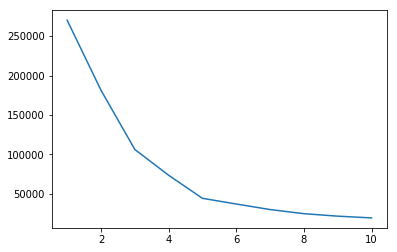

In [13]:
plt.plot(range(1,11), elbow)

###### 5 clusters looks best as per elbow method (from above chart)

In [14]:
## Kmeans Clusing apply with 5 clusters

kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [15]:
y_kmeans

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [16]:
pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


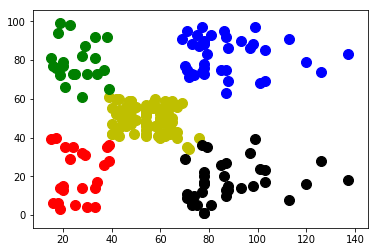

In [19]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='y')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='g')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='b')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='k')

###### Silhouette score for this Kmeans clustering

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_kmeans)

0.553931997444648

######## as its more towards 1, clustering looks good

#### Applying Hierarchical clustering

####### Applying Dendrogram to check and decide number of clusters

In [21]:
import scipy.cluster.hierarchy as sch

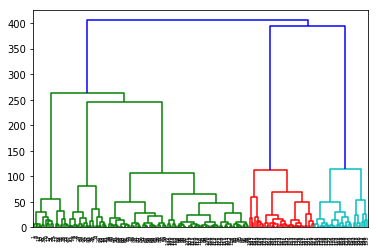

In [22]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

####### going with 5 clusters is a decent option

In [24]:
# Hierarchical clustering is of 2 types. Agglomerative & Devisive. We are doing Agglomerative here

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [25]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [26]:
pd.concat([df, pd.DataFrame(y_hc)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


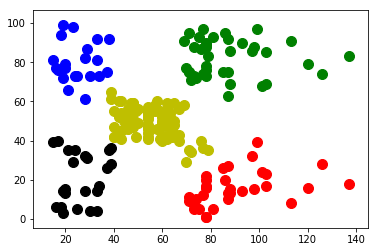

In [27]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='r')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='y')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='g')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='b')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='k')

In [28]:
silhouette_score(x, y_hc)

0.5529945955148897

####### from silhouette scores, it looks Kmeans clustering is better for this dataset